In [28]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [29]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [30]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(int(nGraphRow), int(nGraphPerRow), int(i + 1))
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()



In [31]:
nRowsRead = None 
contructors_data_frame = pd.read_csv('../data/kaggle/constructor_standings.csv', delimiter=',', nrows = nRowsRead)
contructors_data_frame.dataframeName = 'constructor_standings.csv'
nRow, nCol = contructors_data_frame.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 12931 rows and 7 columns


In [32]:
contructors_data_frame.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


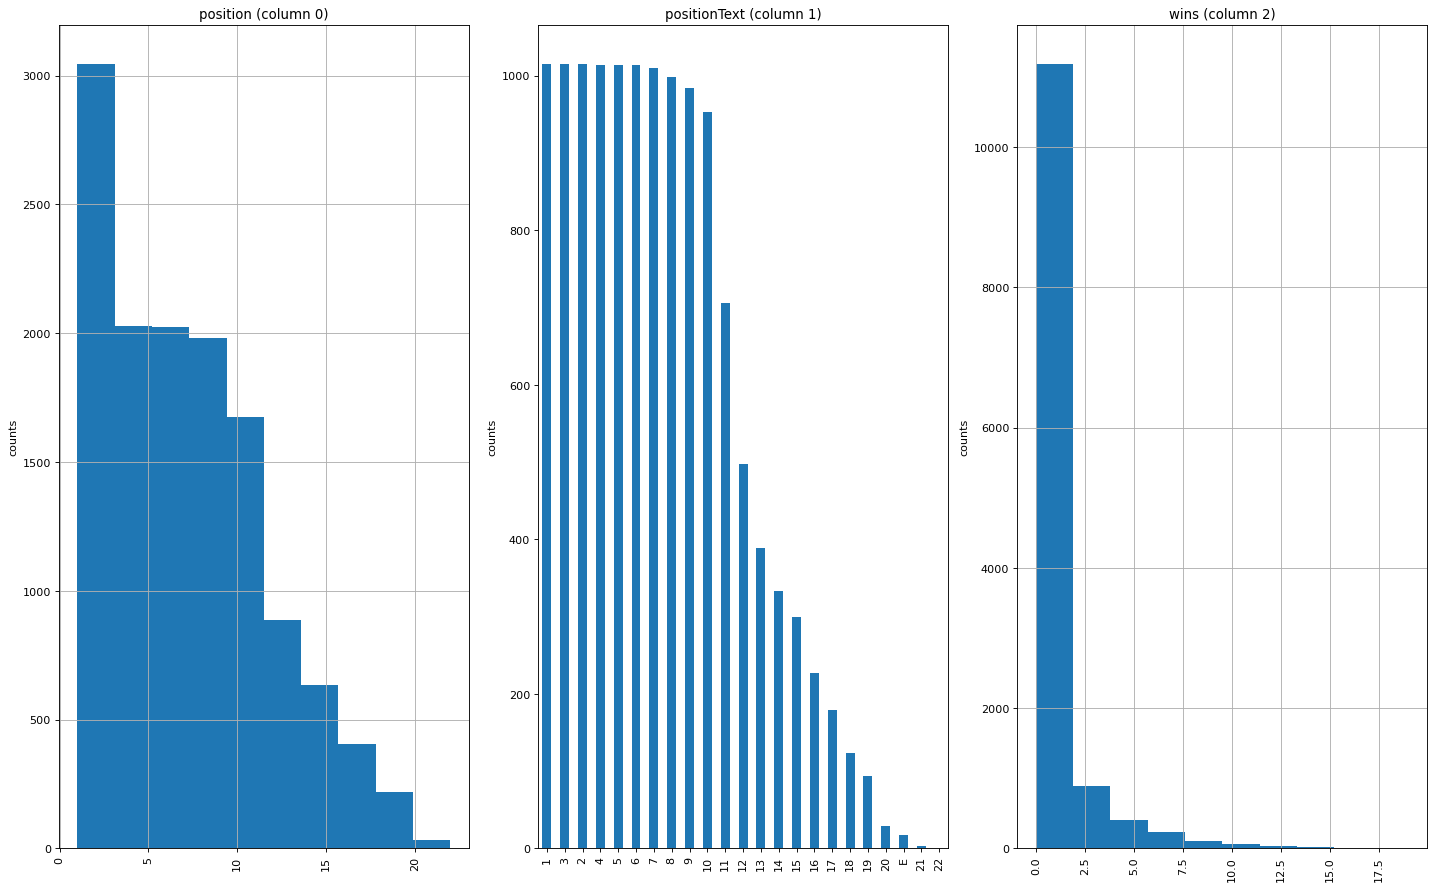

In [33]:
plotPerColumnDistribution(contructors_data_frame, 10, 5)

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


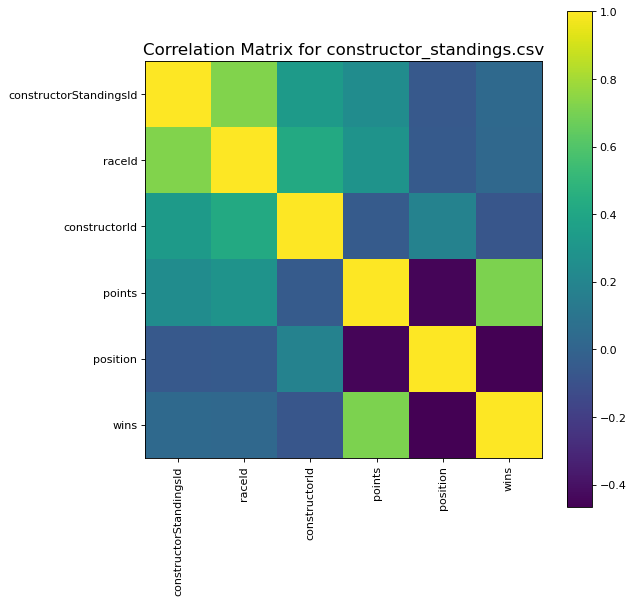

In [34]:
plotCorrelationMatrix(contructors_data_frame, 8)

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


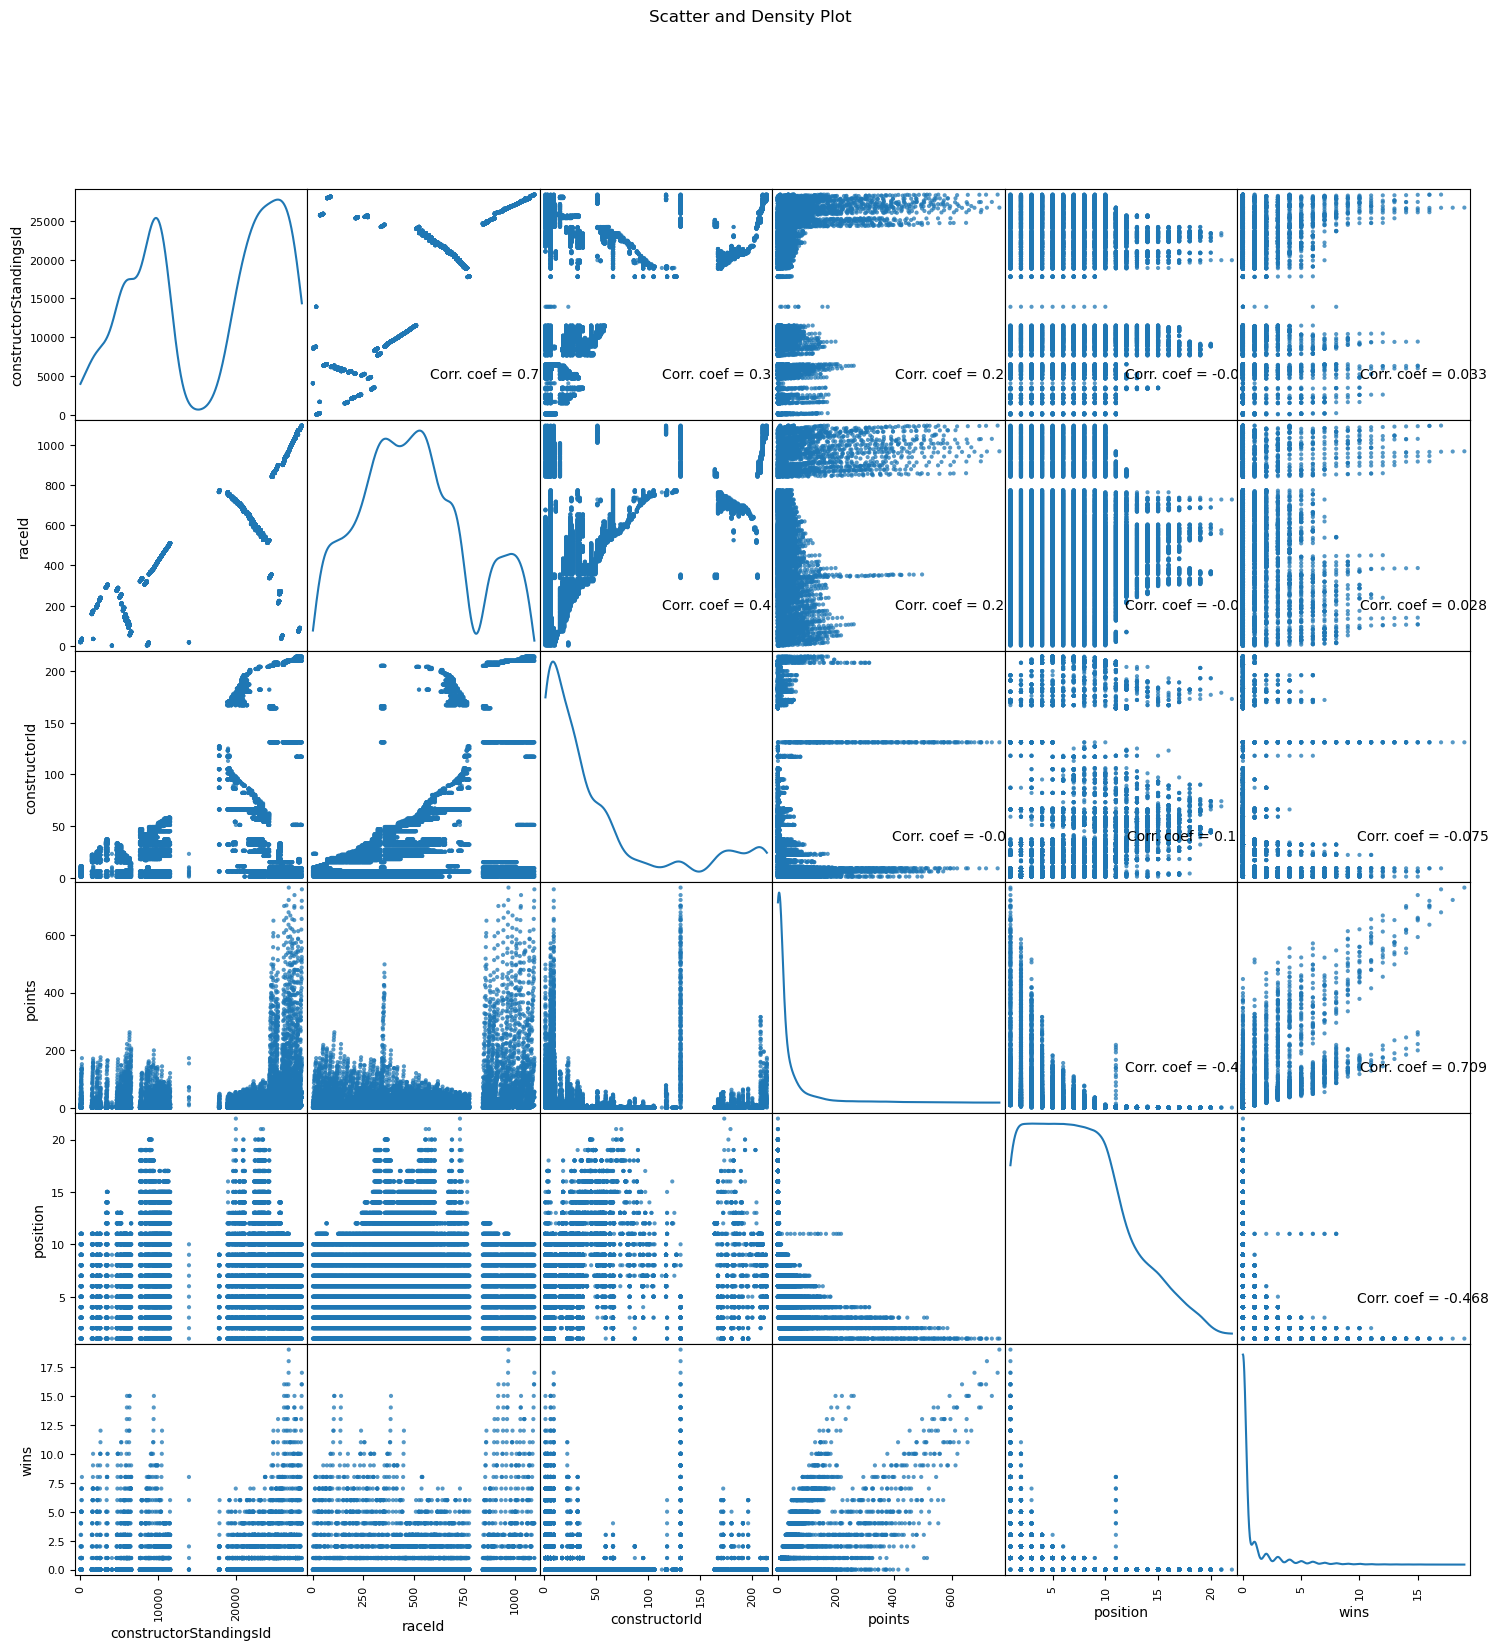

In [35]:
plotScatterMatrix(contructors_data_frame, 18, 10)

In [36]:
nRowsRead = None 
drivers_data_frame = pd.read_csv('../data/kaggle/driver_standings.csv', delimiter=',', nrows = nRowsRead)
drivers_data_frame.dataframeName = 'driver_standings.csv'
nRow, nCol = drivers_data_frame.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 33882 rows and 7 columns


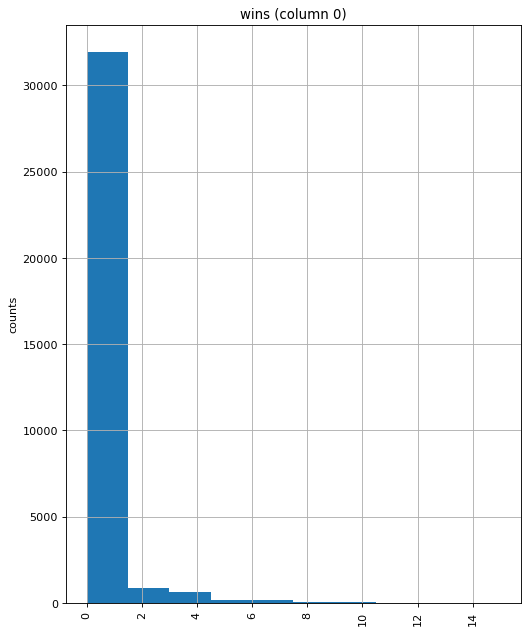

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


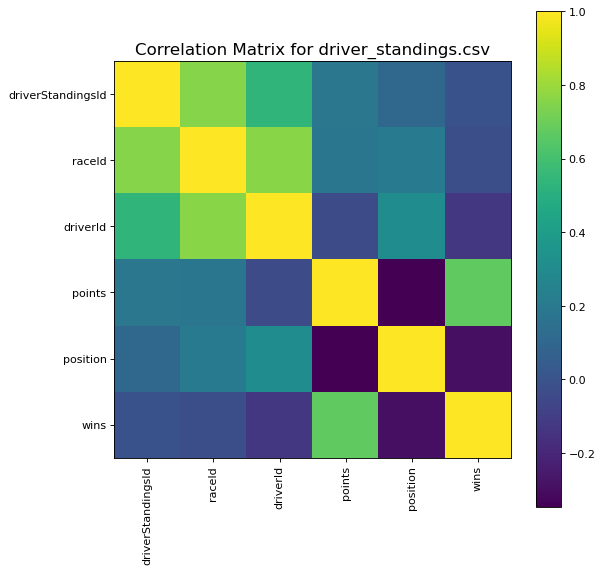

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


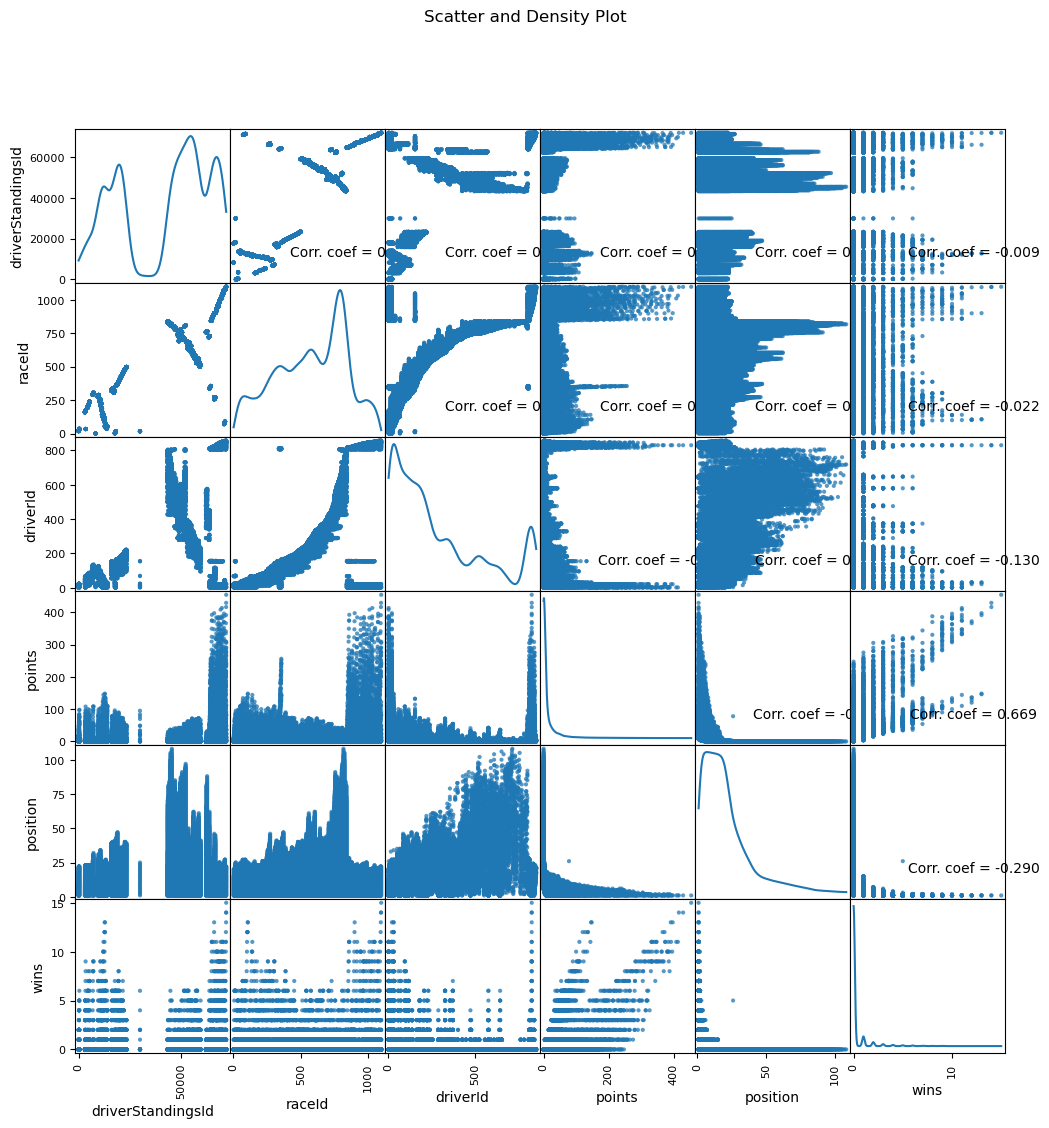

In [37]:
plotPerColumnDistribution(drivers_data_frame, 10, 5)
plotCorrelationMatrix(drivers_data_frame, 8)
plotScatterMatrix(drivers_data_frame, 12, 10)

In [38]:
nRowsRead = None 
laps_data_frame = pd.read_csv('../data/kaggle/lap_times.csv', delimiter=',', nrows = nRowsRead)
laps_data_frame.dataframeName = 'lap_times.csv'
nRow, nCol = laps_data_frame.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 538121 rows and 6 columns


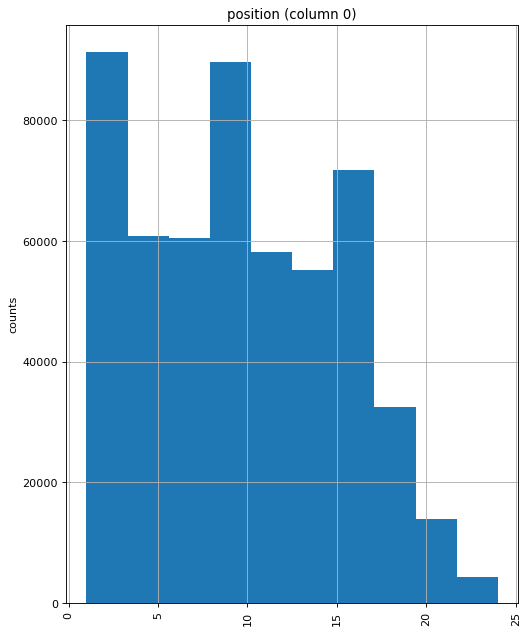

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


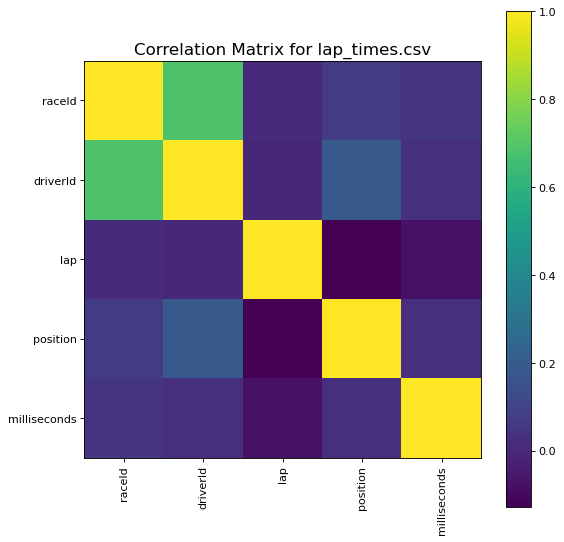

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


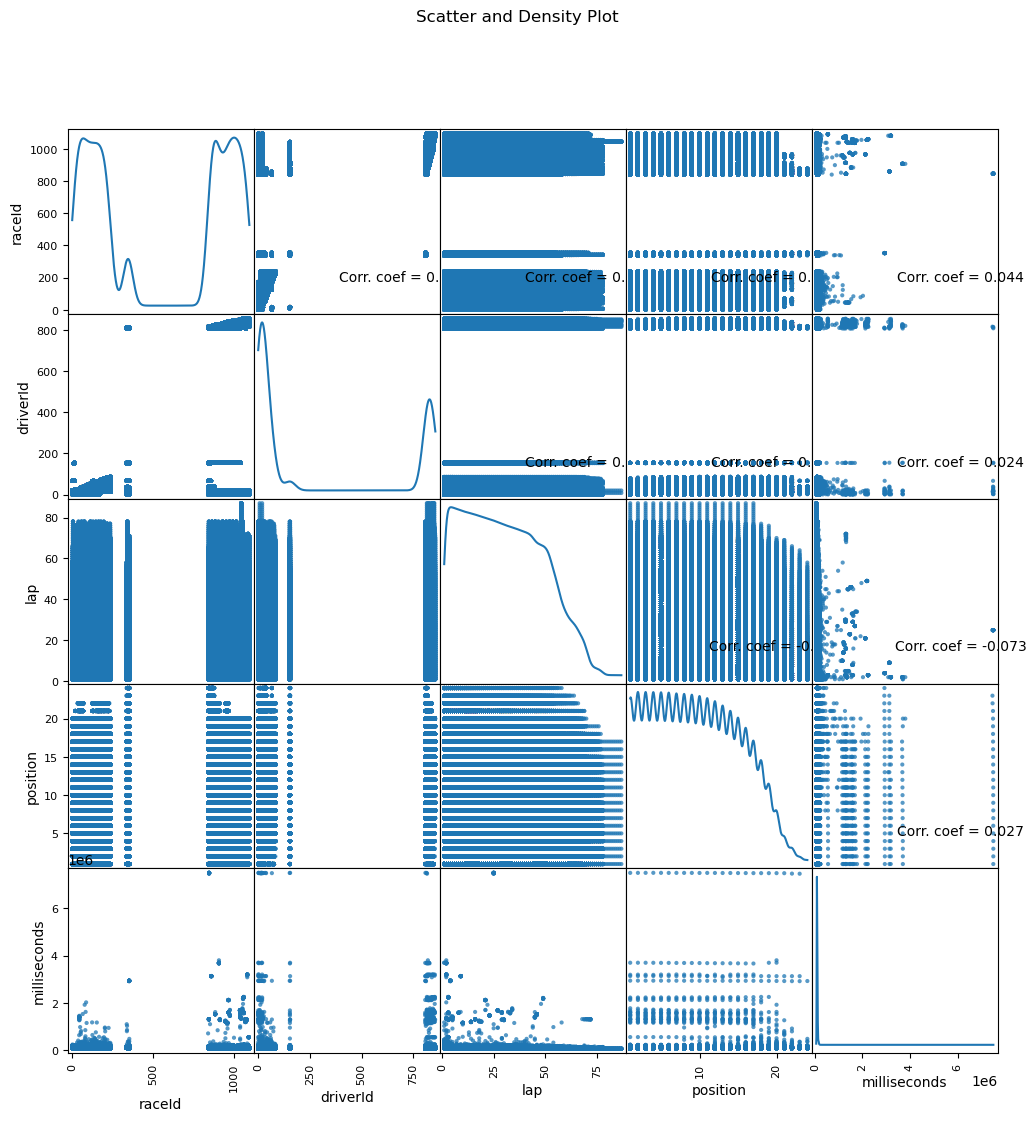

In [39]:
plotPerColumnDistribution(laps_data_frame, 10, 5)
plotCorrelationMatrix(laps_data_frame, 8)
plotScatterMatrix(laps_data_frame, 12, 10)

In [40]:
nRowsRead = None 
pit_stops_data_frame = pd.read_csv('../data/kaggle/pit_stops.csv', delimiter=',', nrows = nRowsRead)
pit_stops_data_frame.dataframeName = 'pit_stops.csv'
nRow, nCol = pit_stops_data_frame.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 9634 rows and 7 columns


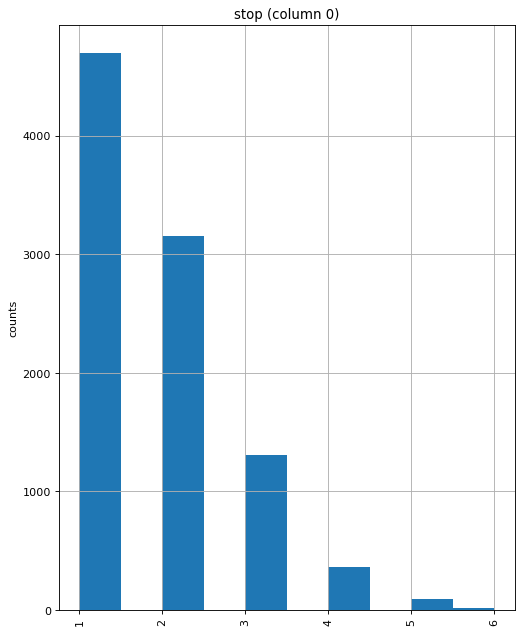

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


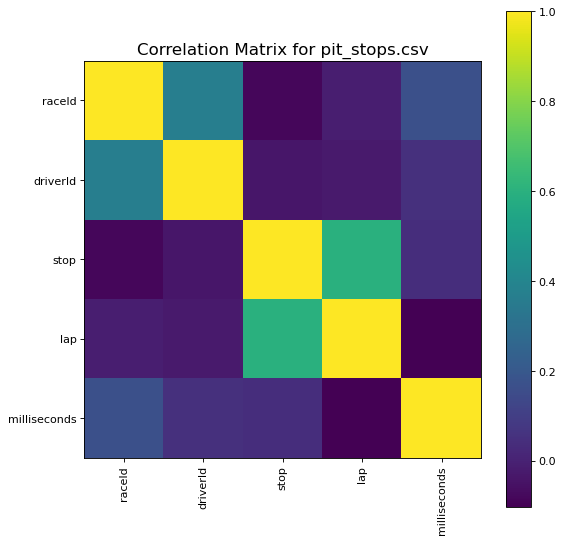

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


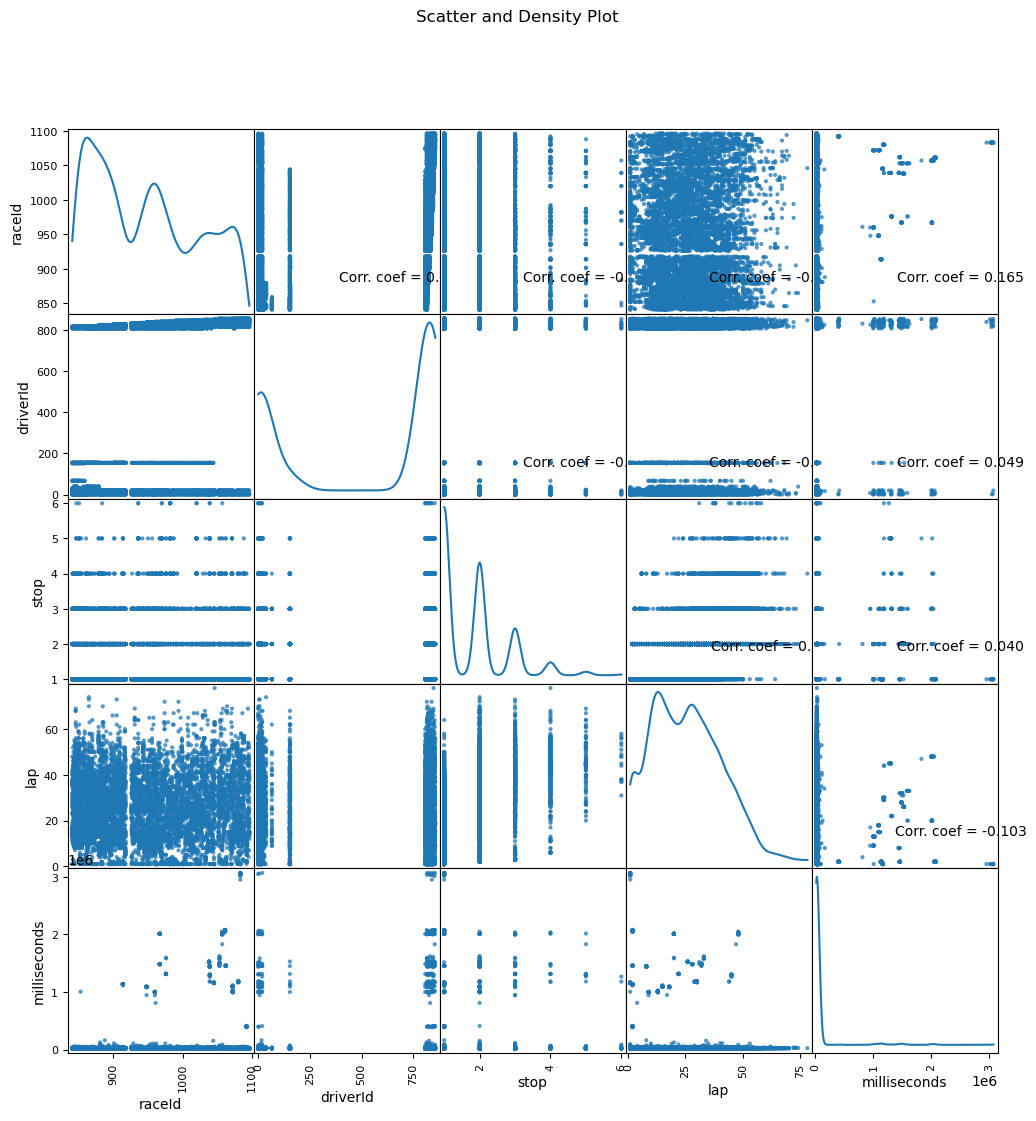

In [41]:
plotPerColumnDistribution(pit_stops_data_frame, 10, 5)
plotCorrelationMatrix(pit_stops_data_frame, 8)
plotScatterMatrix(pit_stops_data_frame, 12, 10)

In [42]:
nRowsRead = None 
qualifying_data_frame = pd.read_csv('../data/kaggle/qualifying.csv', delimiter=',', nrows = nRowsRead)
qualifying_data_frame.dataframeName = 'qualifying.csv'
nRow, nCol = qualifying_data_frame.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 9575 rows and 9 columns


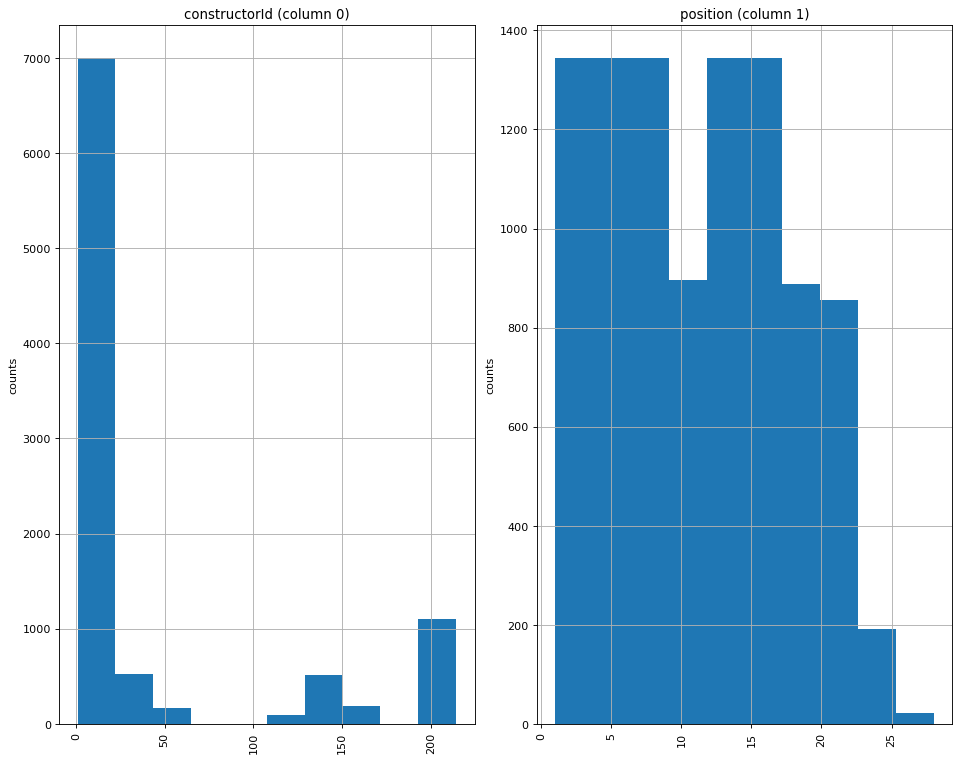

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


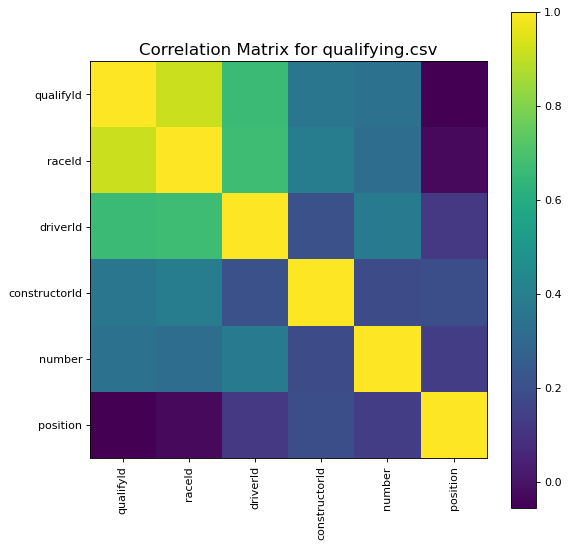

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


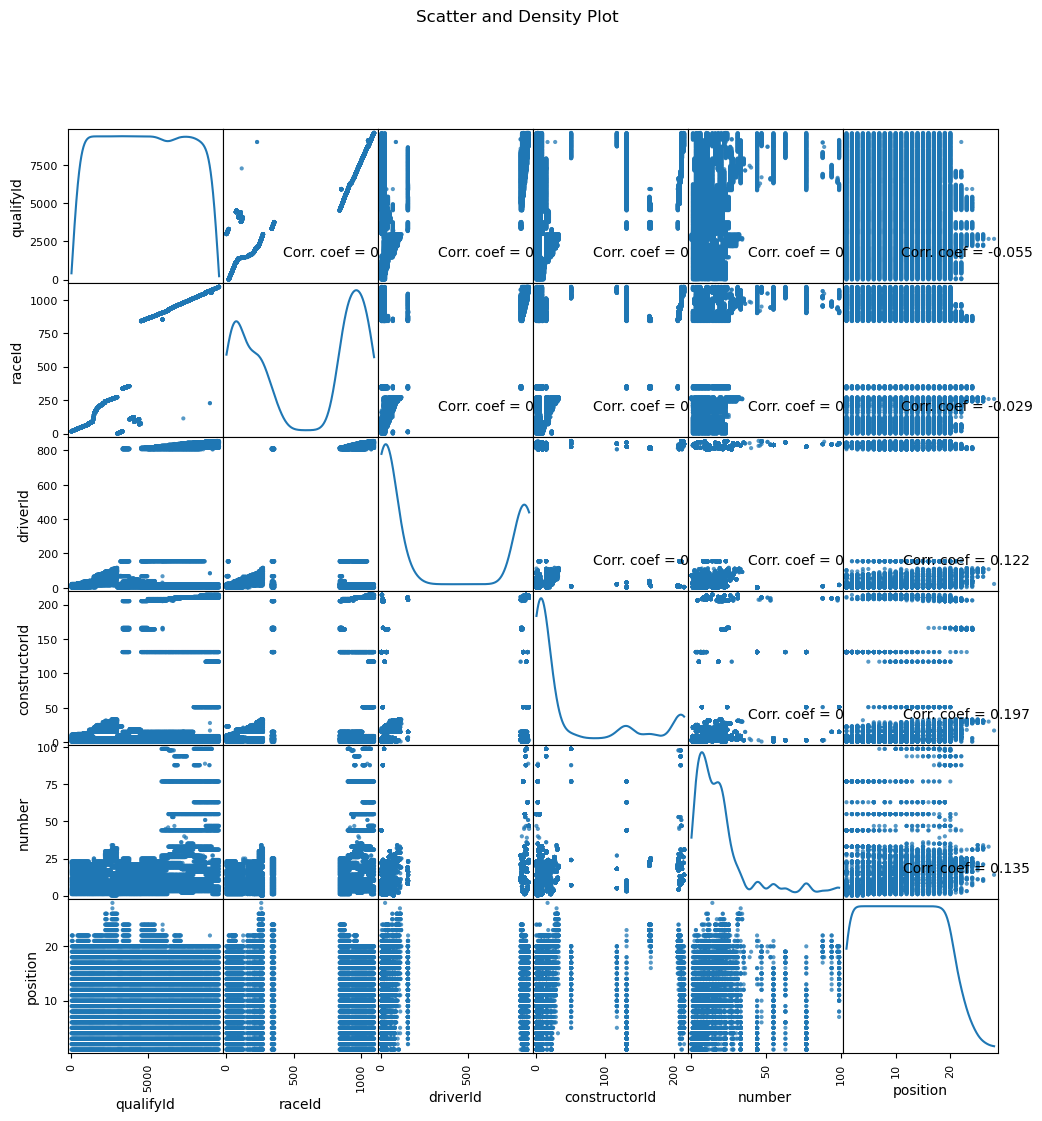

In [43]:
plotPerColumnDistribution(qualifying_data_frame, 10, 5)
plotCorrelationMatrix(qualifying_data_frame, 8)
plotScatterMatrix(qualifying_data_frame, 12, 10)

There are 1079 rows and 18 columns


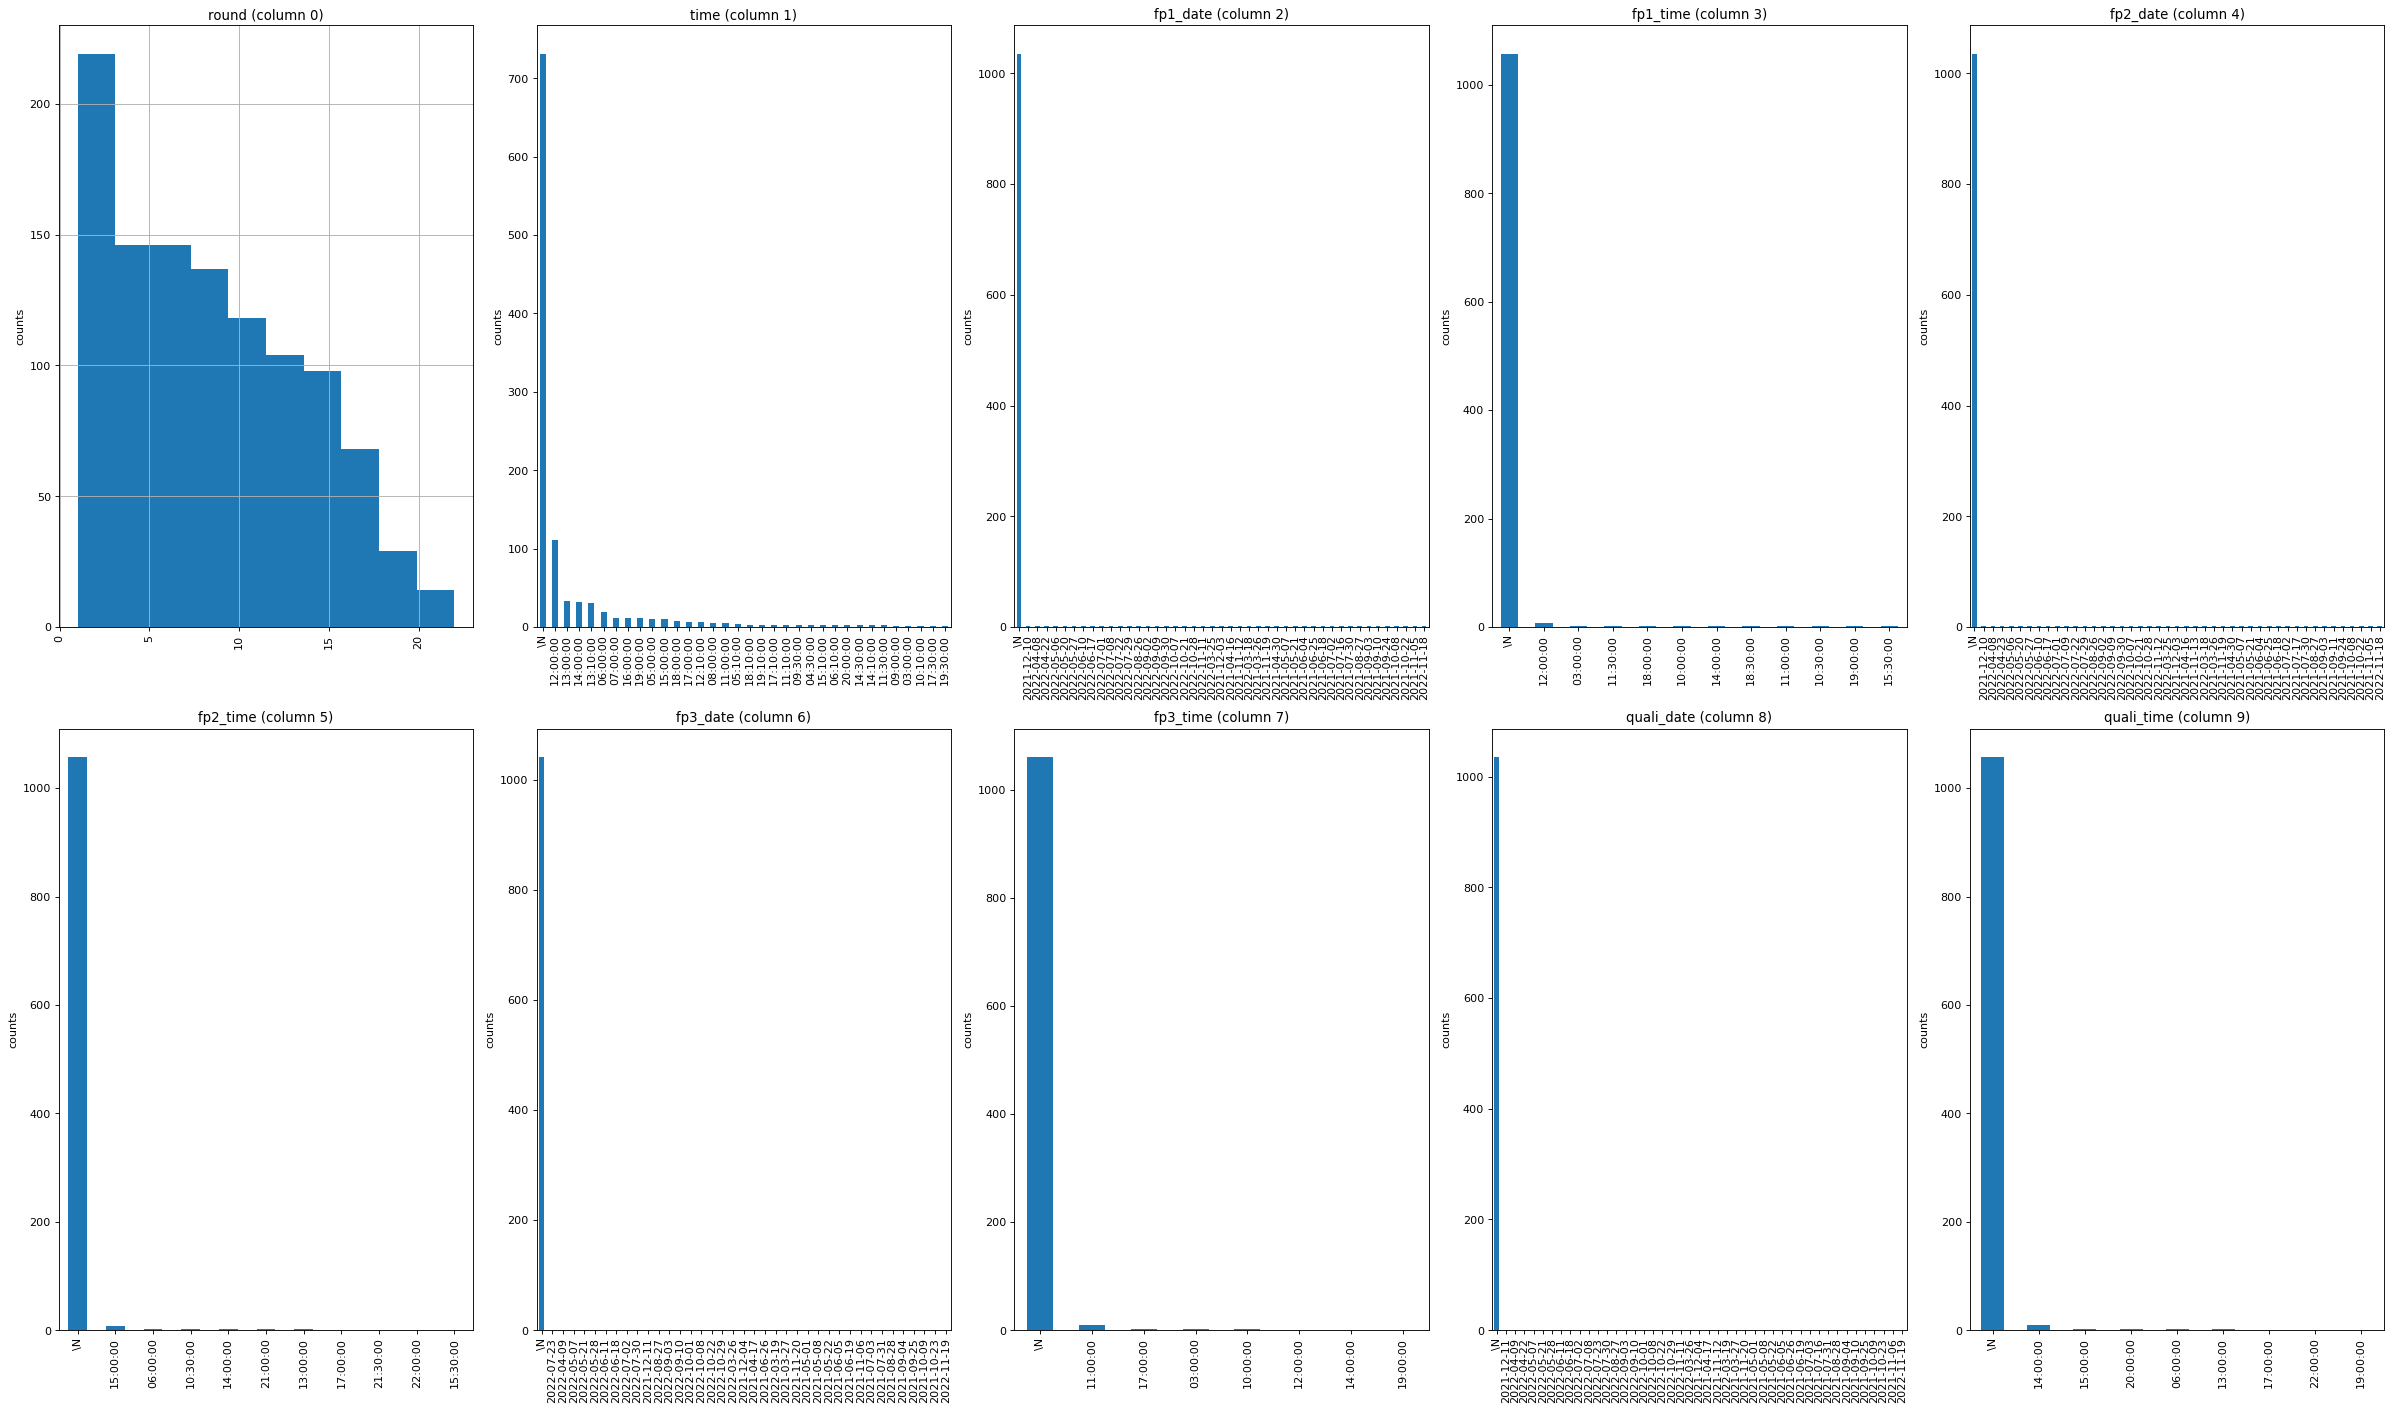

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


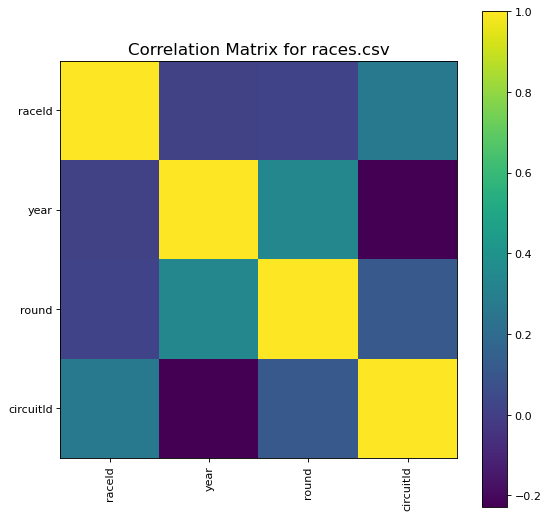

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


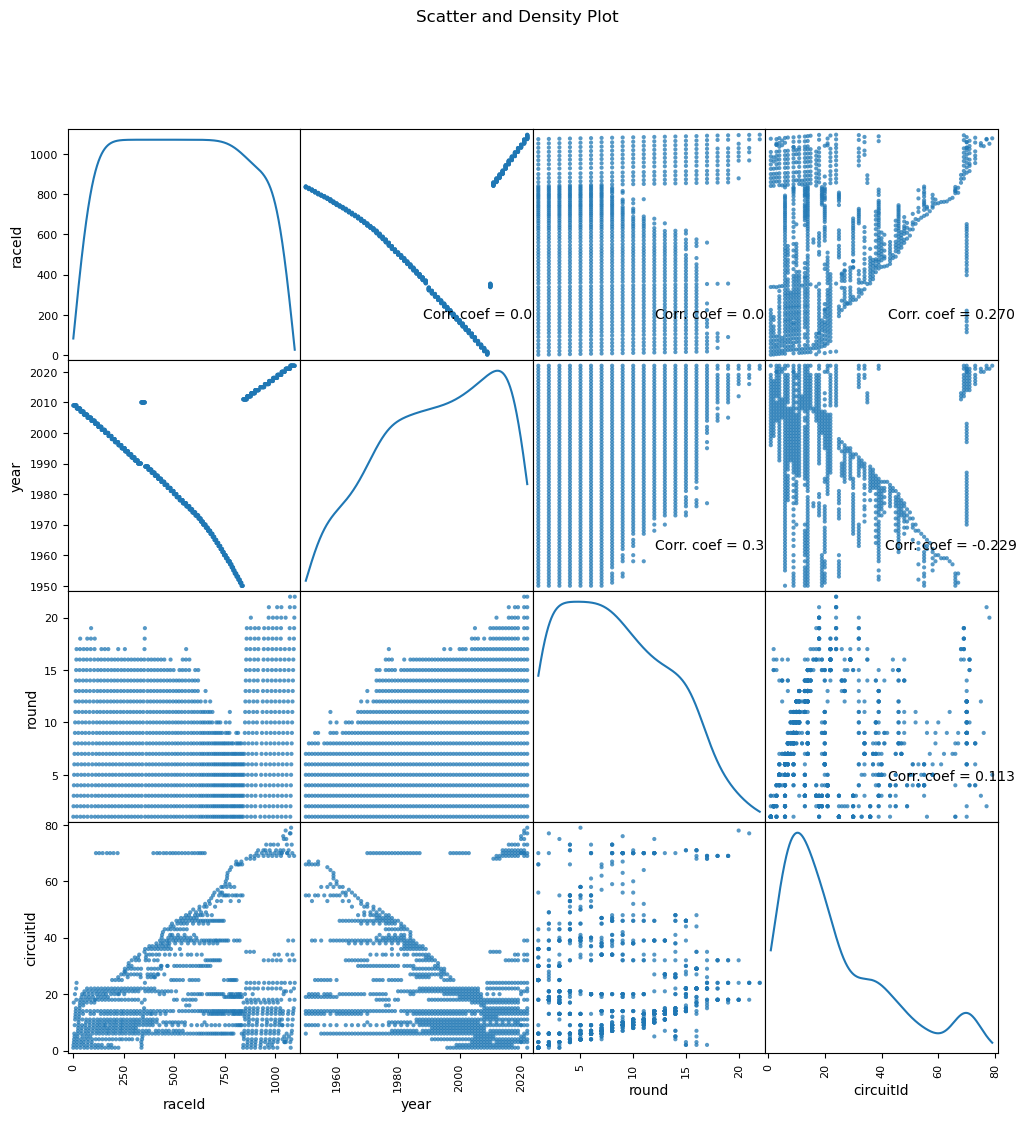

In [45]:
nRowsRead = None 
races_data_frame = pd.read_csv('../data/kaggle/races.csv', delimiter=',', nrows = nRowsRead)
races_data_frame.dataframeName = 'races.csv'
nRow, nCol = races_data_frame.shape
print(f'There are {nRow} rows and {nCol} columns')

plotPerColumnDistribution(races_data_frame, 10, 5)
plotCorrelationMatrix(races_data_frame, 8)
plotScatterMatrix(races_data_frame, 12, 10)

There are 25840 rows and 18 columns


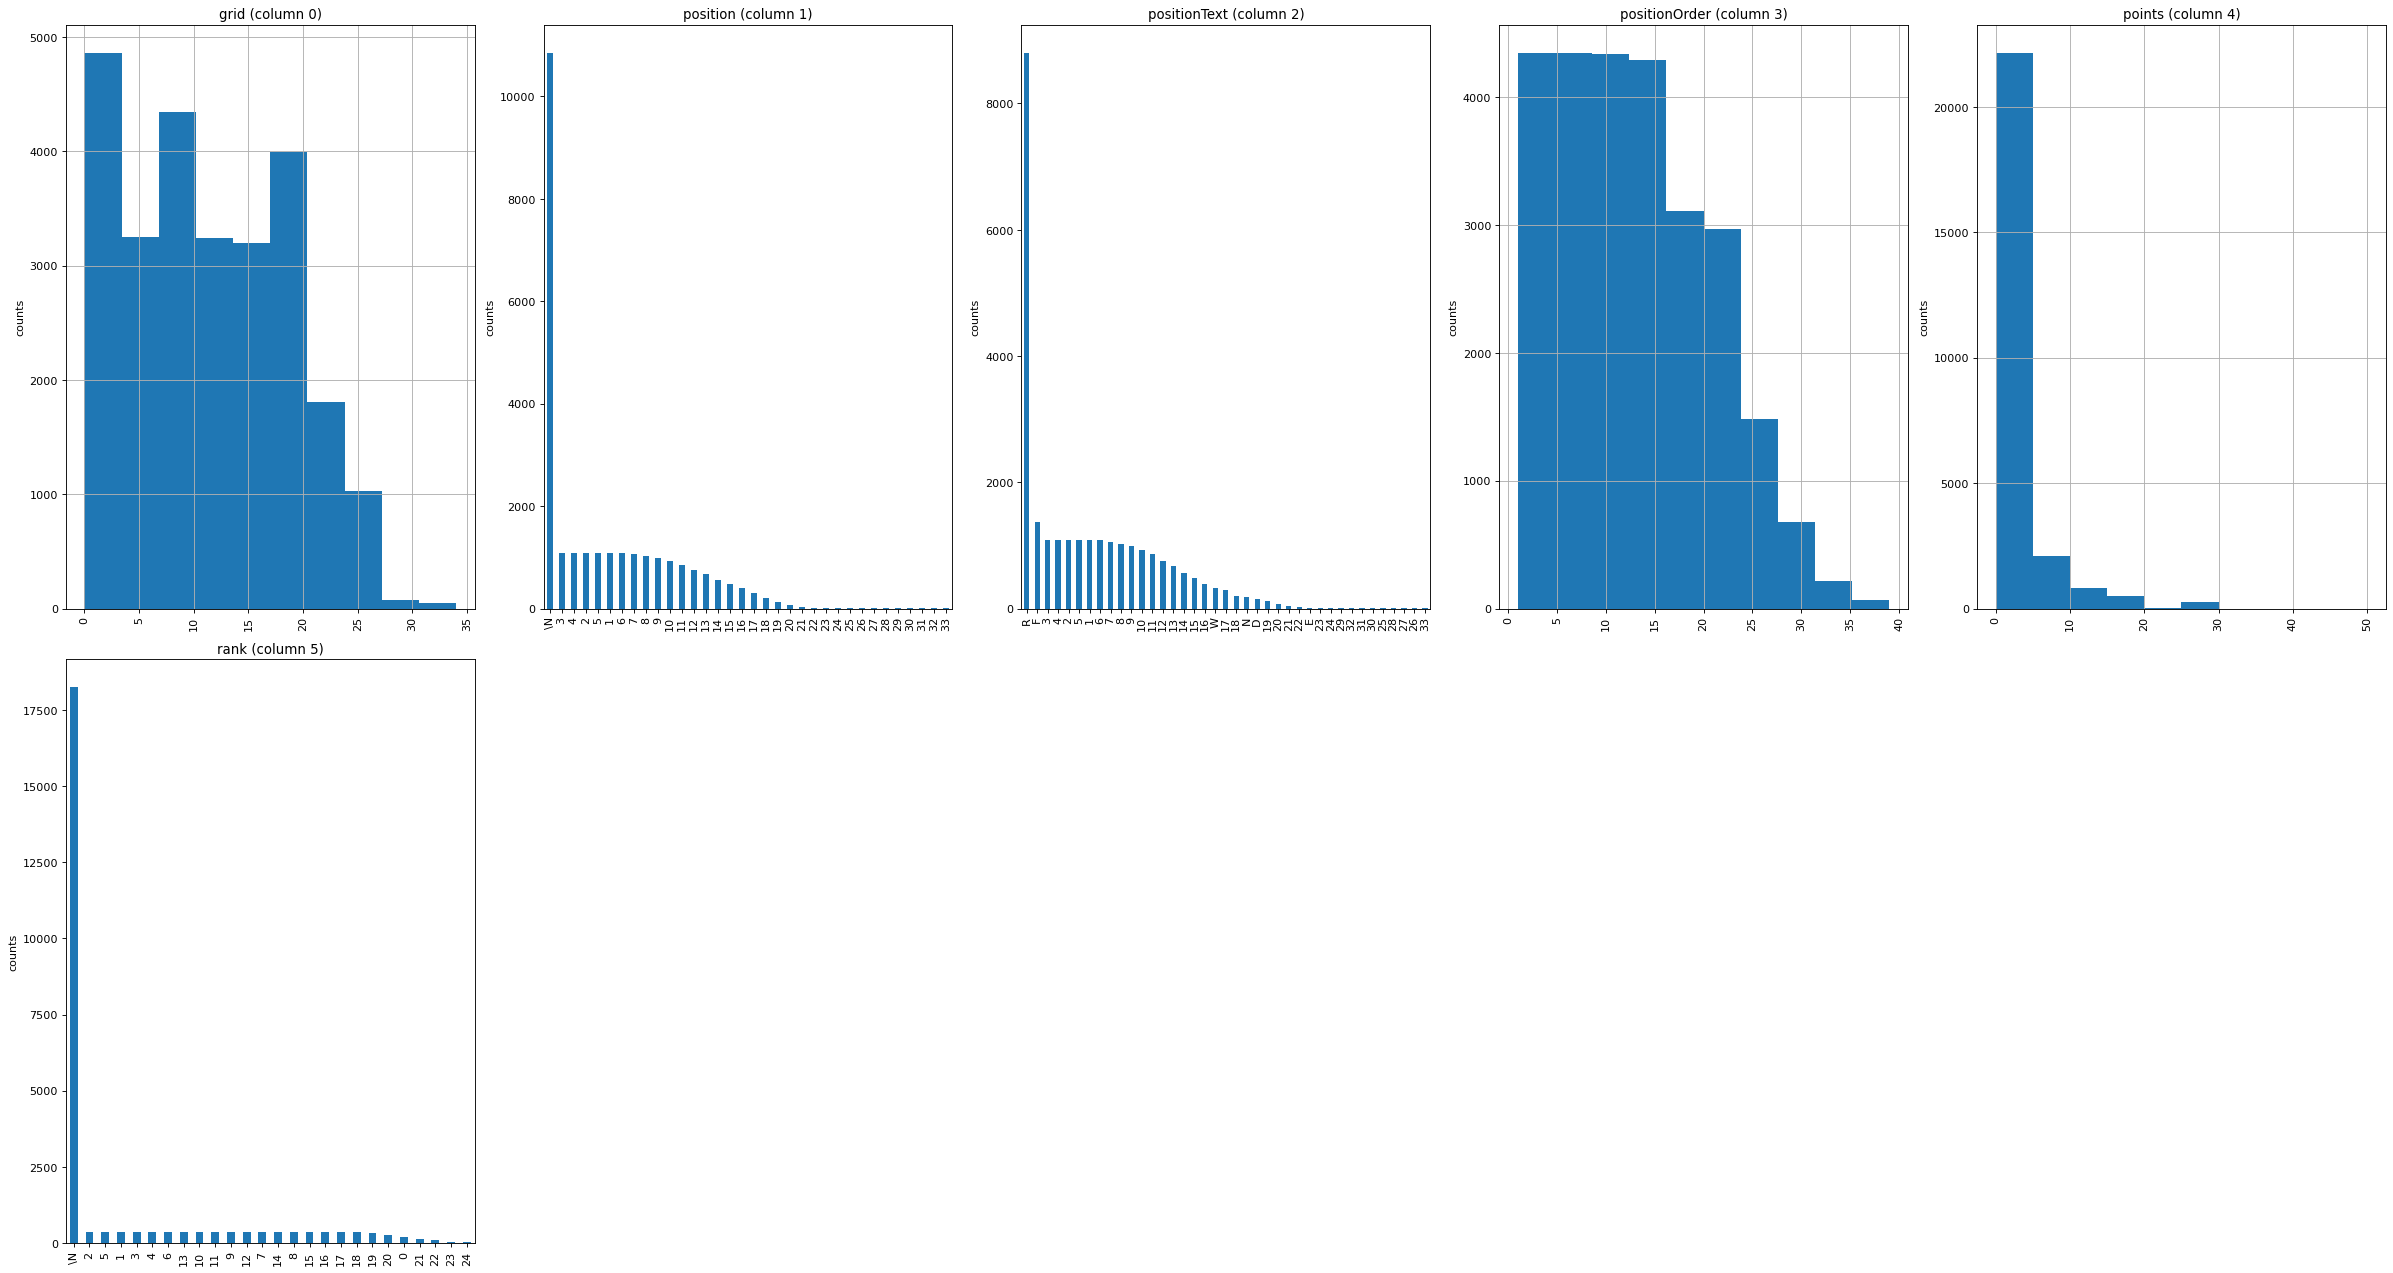

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


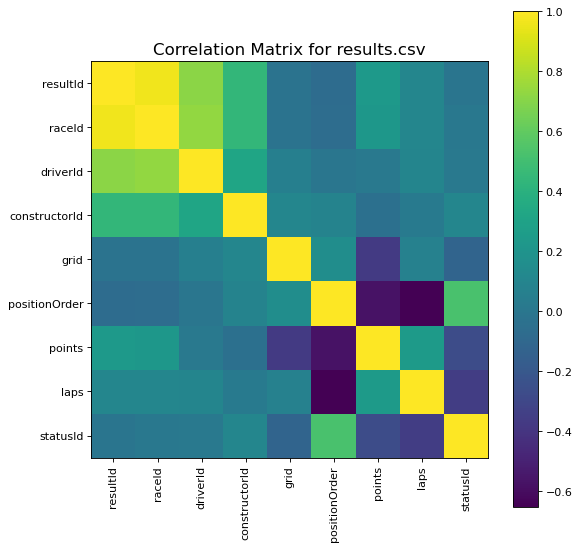

/var/folders/6n/hpwwmfj53x95f4ddc0tptlwr0000gn/T/ipykernel_61441/1536421532.py:47: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


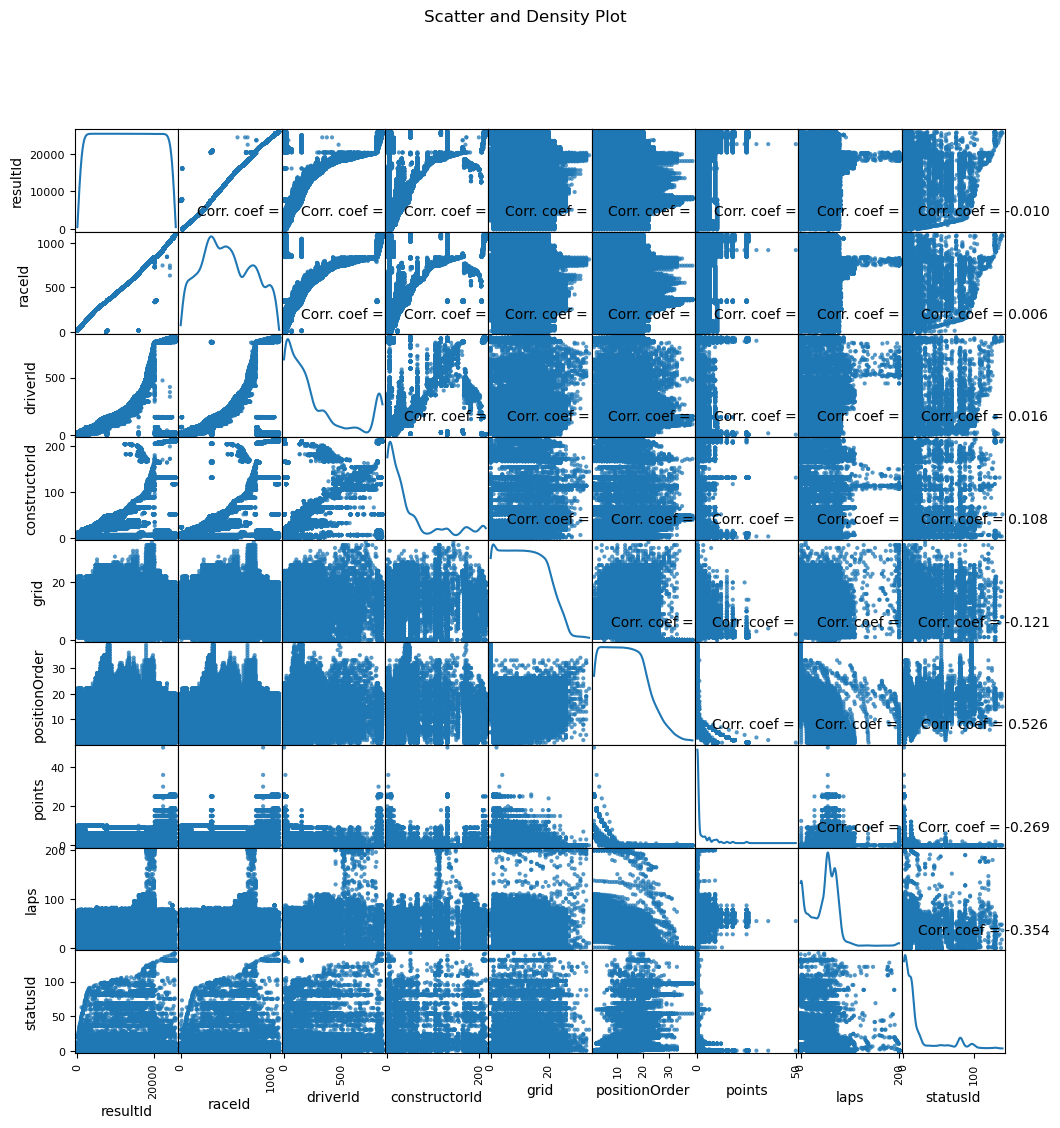

In [46]:
nRowsRead = None 
results_data_frame = pd.read_csv('../data/kaggle/results.csv', delimiter=',', nrows = nRowsRead)
results_data_frame.dataframeName = 'results.csv'
nRow, nCol = results_data_frame.shape
print(f'There are {nRow} rows and {nCol} columns')

plotPerColumnDistribution(results_data_frame, 10, 5)
plotCorrelationMatrix(results_data_frame, 8)
plotScatterMatrix(results_data_frame, 12, 10)